In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import copy
import seaborn as sns
import os
from scipy import stats
import datetime
from pyclustertend import hopkins

import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [2]:
def silhouette(X,max_clusters = 9):
    distortions = []
    
    for i in range(2, max_clusters +1):
        
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0).fit(X)
        
        labels = km.labels_
        
        distortions.append((i,metrics.silhouette_score(X, labels, metric='euclidean')))

    return(distortions)

In [3]:
def plot_distortion(X,label,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o', label = label)
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.legend()

In [4]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        
        #print(cluster)
        #print(y_res == cluster)
        
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=100,
                    marker='.',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='black',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

# Credit

In [5]:
credit_scaled = pd.read_csv('credit_scaled.csv')
credit_radar = pd.read_csv('credit_radar.csv')
credit_PCA_kmean = pd.read_csv('credit_PCA_kmean.csv')

In [6]:
credit_scaled.drop('Unnamed: 0', axis = 1, inplace = True)
credit_radar.drop('Unnamed: 0', axis = 1, inplace = True)
credit_PCA_kmean.drop('Unnamed: 0', axis = 1, inplace = True)

### clusters on PCA axis

In [7]:
x_scale = credit_scaled.values

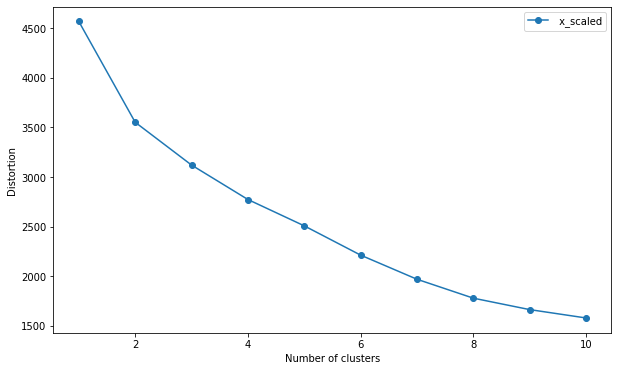

In [8]:
# elbow rule
fig, ax = plt.subplots(figsize=(10,6))
plot_distortion(x_scale,' x_scaled')

In [9]:
silhouette(x_scale)

[(2, 0.45297024019428894),
 (3, 0.4528975677423422),
 (4, 0.1876721707193031),
 (5, 0.24551411998021452),
 (6, 0.1848632807397158),
 (7, 0.1993003681872425),
 (8, 0.21280760236622231),
 (9, 0.2180337018689162)]

0.08339913984154482


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

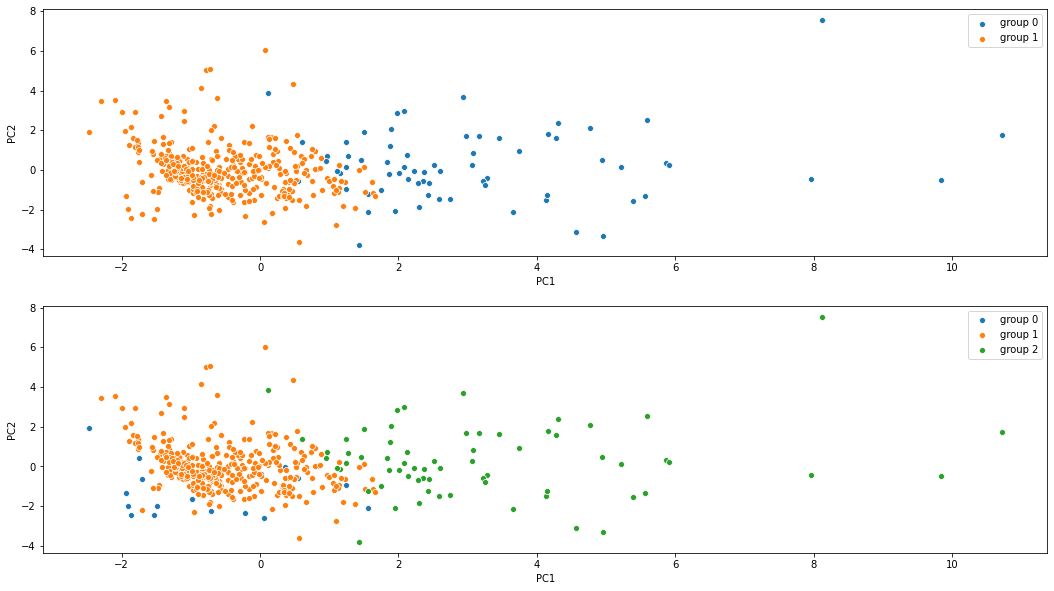

In [10]:
print(hopkins(x_scale,x_scale.shape[0]))

#plot clusters
fig, ax = plt.subplots(2,figsize=(18,10))
KM = KMeans(n_clusters = 2)
y_res = KM.fit_predict(x_scale)
credit_PCA_kmean['y_res'] = y_res
sns.scatterplot(x="PC1", y="PC2", data=credit_PCA_kmean[credit_PCA_kmean['y_res']==0], label = 'group 0',ax = ax[0])
sns.scatterplot(x="PC1", y="PC2", data=credit_PCA_kmean[credit_PCA_kmean['y_res']==1], label = 'group 1',ax = ax[0])

KM = KMeans(n_clusters = 3)
y_res = KM.fit_predict(x_scale)
credit_PCA_kmean['y_res'] = y_res
sns.scatterplot(x="PC1", y="PC2", data=credit_PCA_kmean[credit_PCA_kmean['y_res']==0], label = 'group 0',ax = ax[1])
sns.scatterplot(x="PC1", y="PC2", data=credit_PCA_kmean[credit_PCA_kmean['y_res']==1], label = 'group 1',ax = ax[1])
sns.scatterplot(x="PC1", y="PC2", data=credit_PCA_kmean[credit_PCA_kmean['y_res']==2], label = 'group 2',ax = ax[1])

### Radar chart

In [11]:
categories = ['income', 'credit_limit', 'starting_balance', 'ending_balance','abs_tran_amt', 'credit_rating', 'small_tran', 'large_tran']

In [12]:
group_0 = []
group_1 = []

for i in categories:
    group_0.append(np.mean(credit_radar[i][credit_radar['cluster'] == 0]))
    group_1.append(np.mean(credit_radar[i][credit_radar['cluster'] == 1]))

In [13]:
group_0_df = pd.DataFrame(dict(means= group_0, category = categories))
group_1_df = pd.DataFrame(dict(means= group_1, category = categories))

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=group_0_df['means'],theta=group_0_df['category'],fill='toself',name='group 0'))

fig.add_trace(go.Scatterpolar(r=group_1_df['means'],theta=group_1_df['category'],fill='toself',name='group 1'))

fig.update_layout(
    autosize = False,
    width=700,
    height=700,
    polar=dict(
        radialaxis=dict(
          visible=True,
    )),
  showlegend=True
)

fig.show()

In [263]:
x_scale = credit_scaled.values
KM = KMeans(n_clusters = 3)
y_res = KM.fit_predict(x_scale)

In [264]:
credit_radar['cluster'] = y_res

In [265]:
group_0 = []
group_1 = []
group_2 = []

for i in categories:
    group_0.append(np.mean(credit_radar[i][credit_radar['cluster'] == 0]))
    group_1.append(np.mean(credit_radar[i][credit_radar['cluster'] == 1]))
    group_2.append(np.mean(credit_radar[i][credit_radar['cluster'] == 2]))

In [266]:
group_0_df = pd.DataFrame(dict(means= group_0, category = categories))
group_1_df = pd.DataFrame(dict(means= group_1, category = categories))
group_2_df = pd.DataFrame(dict(means= group_2, category = categories))

In [267]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=group_0_df['means'],theta=group_0_df['category'],fill='toself',name='group 0'))
fig.add_trace(go.Scatterpolar(r=group_1_df['means'],theta=group_1_df['category'],fill='toself',name='group 1'))
fig.add_trace(go.Scatterpolar(r=group_2_df['means'],theta=group_2_df['category'],fill='toself',name='group 2'))

fig.update_layout(
    autosize = False,
    width=700,
    height=700,
    polar=dict(
        radialaxis=dict(
          visible=True,
    )),
  showlegend=True
)

fig.show()

# Checking

In [268]:
checking_scaled = pd.read_csv('checking_scaled.csv')
checking_radar = pd.read_csv('checking_radar.csv')
checking_PCA_kmean = pd.read_csv('checking_PCA_kmean.csv')

In [269]:
checking_scaled.drop('Unnamed: 0', axis = 1, inplace = True)
checking_radar.drop('Unnamed: 0', axis = 1, inplace = True)
checking_PCA_kmean.drop('Unnamed: 0', axis = 1, inplace = True)

## Cluster on PCA axis

In [270]:
x_scale = checking_scaled.values

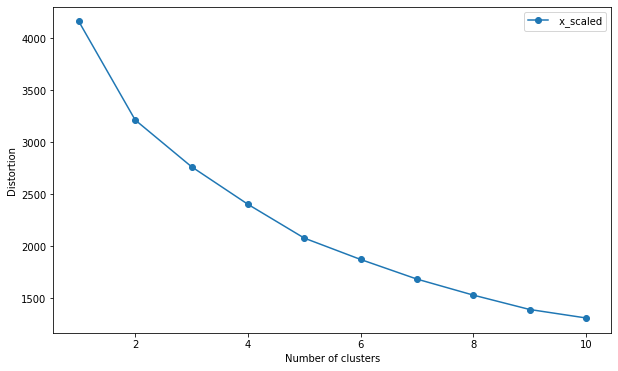

In [271]:
# elbow rule
fig, ax = plt.subplots(figsize=(10,6))
plot_distortion(x_scale,' x_scaled')

In [272]:
silhouette(x_scale)

[(2, 0.28237456677089584),
 (3, 0.3077212875129513),
 (4, 0.30189615828015703),
 (5, 0.27029750539806446),
 (6, 0.2645006774149792),
 (7, 0.27775636185637964),
 (8, 0.28301429851680304),
 (9, 0.2947560601273804)]

0.10862329879729413


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

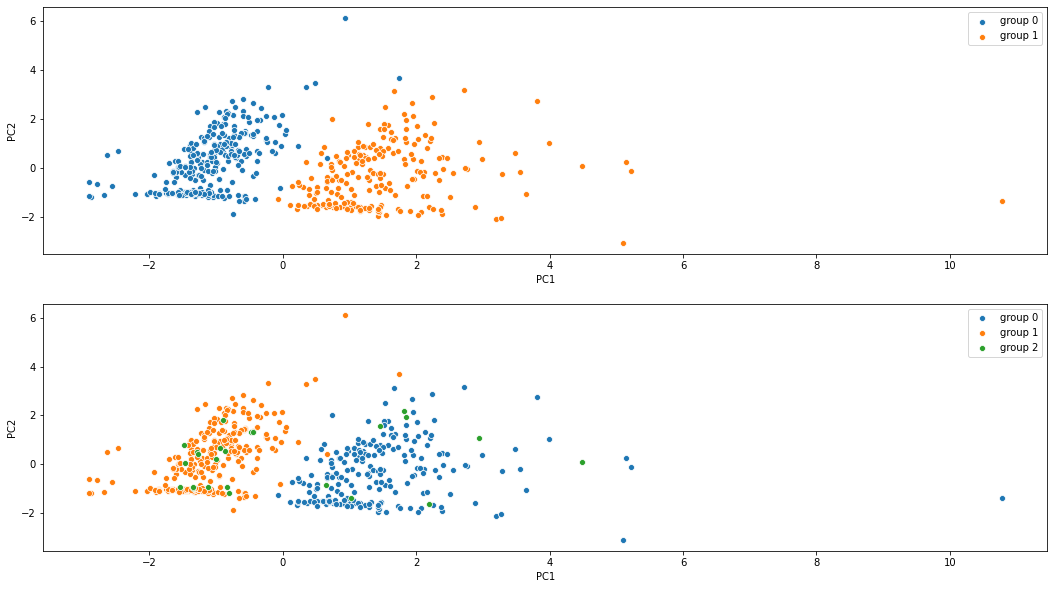

In [273]:
print(hopkins(x_scale,x_scale.shape[0]))

#plot clusters
fig, ax = plt.subplots(2,figsize=(18,10))
KM = KMeans(n_clusters = 2)
y_res = KM.fit_predict(x_scale)
checking_PCA_kmean['y_res'] = y_res
sns.scatterplot(x="PC1", y="PC2", data=checking_PCA_kmean[checking_PCA_kmean['y_res']==0], label = 'group 0',ax = ax[0])
sns.scatterplot(x="PC1", y="PC2", data=checking_PCA_kmean[checking_PCA_kmean['y_res']==1], label = 'group 1',ax = ax[0])

KM = KMeans(n_clusters = 3)
y_res = KM.fit_predict(x_scale)
checking_PCA_kmean['y_res'] = y_res
sns.scatterplot(x="PC1", y="PC2", data=checking_PCA_kmean[checking_PCA_kmean['y_res']==0], label = 'group 0',ax = ax[1])
sns.scatterplot(x="PC1", y="PC2", data=checking_PCA_kmean[checking_PCA_kmean['y_res']==1], label = 'group 1',ax = ax[1])
sns.scatterplot(x="PC1", y="PC2", data=checking_PCA_kmean[checking_PCA_kmean['y_res']==2], label = 'group 2',ax = ax[1])

### Radar Chart

In [274]:
categories = ['income', 'minimum_balance', 'starting_balance', 'ending_balance', 'acc_start', 'small_tran', 'large_tran']

In [275]:
group_0 = []
group_1 = []

for i in categories:
    group_0.append(np.mean(checking_radar[i][checking_radar['cluster'] == 0]))
    group_1.append(np.mean(checking_radar[i][checking_radar['cluster'] == 1]))

In [276]:
group_0_df = pd.DataFrame(dict(means= group_0, category = categories))
group_1_df = pd.DataFrame(dict(means= group_1, category = categories))

In [277]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=group_0_df['means'],theta=group_0_df['category'],fill='toself',name='group 0'))

fig.add_trace(go.Scatterpolar(r=group_1_df['means'],theta=group_1_df['category'],fill='toself',name='group 1'))

fig.update_layout(
    autosize = False,
    width=700,
    height=700,
    polar=dict(
        radialaxis=dict(
          visible=True,
    )),
  showlegend=True
)

fig.show()

In [278]:
x_scale = checking_scaled.values
KM = KMeans(n_clusters = 3)
y_res = KM.fit_predict(x_scale)

In [279]:
checking_radar['cluster'] = y_res

In [280]:
group_0 = []
group_1 = []
group_2 = []

for i in categories:
    group_0.append(np.mean(checking_radar[i][checking_radar['cluster'] == 0]))
    group_1.append(np.mean(checking_radar[i][checking_radar['cluster'] == 1]))
    group_2.append(np.mean(checking_radar[i][checking_radar['cluster'] == 2]))

In [281]:
group_0_df = pd.DataFrame(dict(means= group_0, category = categories))
group_1_df = pd.DataFrame(dict(means= group_1, category = categories))
group_2_df = pd.DataFrame(dict(means= group_2, category = categories))

In [282]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=group_0_df['means'],theta=group_0_df['category'],fill='toself',name='group 0'))
fig.add_trace(go.Scatterpolar(r=group_1_df['means'],theta=group_1_df['category'],fill='toself',name='group 1'))
fig.add_trace(go.Scatterpolar(r=group_2_df['means'],theta=group_2_df['category'],fill='toself',name='group 2'))

fig.update_layout(
    autosize = False,
    width=700,
    height=700,
    polar=dict(
        radialaxis=dict(
          visible=True,
    )),
  showlegend=True
)

fig.show()

# Savings

In [283]:
savings_scaled = pd.read_csv('savings_scaled.csv')
savings_radar = pd.read_csv('savings_radar.csv')
savings_PCA_kmean = pd.read_csv('savings_PCA_kmean.csv')

In [284]:
savings_scaled.drop('Unnamed: 0', axis = 1, inplace = True)
savings_radar.drop('Unnamed: 0', axis = 1, inplace = True)
savings_PCA_kmean.drop('Unnamed: 0', axis = 1, inplace = True)

## Cluster on PCA

In [285]:
x_scale = savings_scaled.values

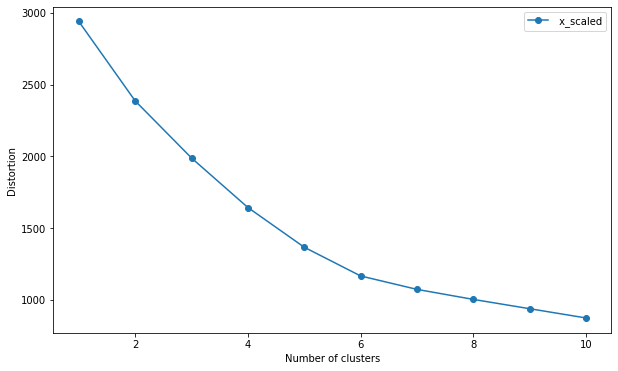

In [286]:
# elbow rule
fig, ax = plt.subplots(figsize=(10,6))
plot_distortion(x_scale,' x_scaled')

In [287]:
silhouette(x_scale)

[(2, 0.3798520814273047),
 (3, 0.21748713770075379),
 (4, 0.2508616691514239),
 (5, 0.2987706982624449),
 (6, 0.3146528647805162),
 (7, 0.29927905402742105),
 (8, 0.3127641227400832),
 (9, 0.2533581992611039)]

0.12405684663290051


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

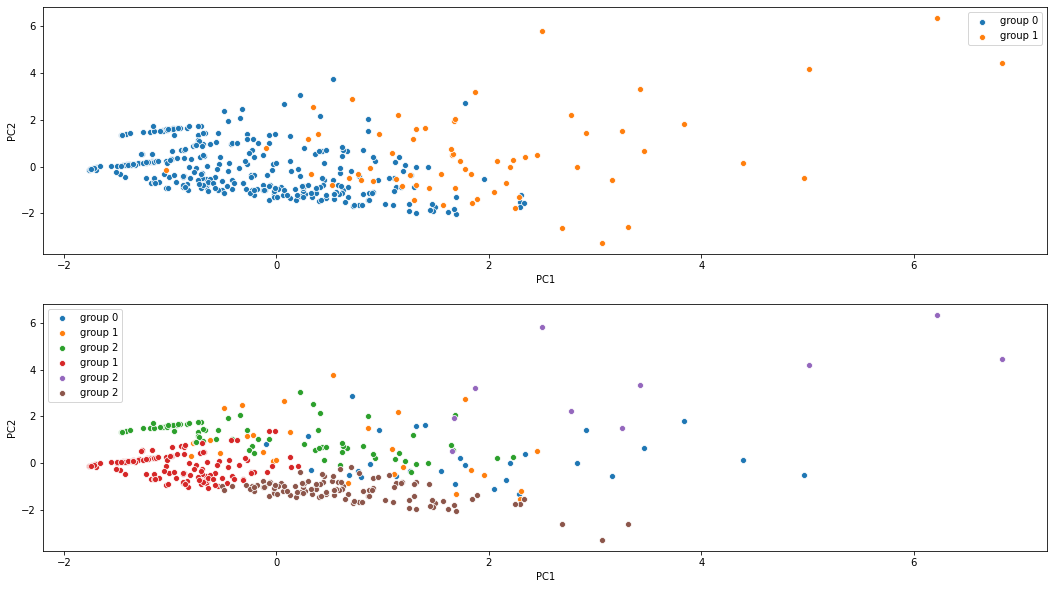

In [288]:
print(hopkins(x_scale,x_scale.shape[0]))

#plot clusters
fig, ax = plt.subplots(2,figsize=(18,10))
KM = KMeans(n_clusters = 2)
y_res = KM.fit_predict(x_scale)
savings_PCA_kmean['y_res'] = y_res
sns.scatterplot(x="PC1", y="PC2", data=savings_PCA_kmean[savings_PCA_kmean['y_res']==0], label = 'group 0',ax = ax[0])
sns.scatterplot(x="PC1", y="PC2", data=savings_PCA_kmean[savings_PCA_kmean['y_res']==1], label = 'group 1',ax = ax[0])

KM = KMeans(n_clusters = 6)
y_res = KM.fit_predict(x_scale)
savings_PCA_kmean['y_res'] = y_res
sns.scatterplot(x="PC1", y="PC2", data=savings_PCA_kmean[savings_PCA_kmean['y_res']==0], label = 'group 0',ax = ax[1])
sns.scatterplot(x="PC1", y="PC2", data=savings_PCA_kmean[savings_PCA_kmean['y_res']==1], label = 'group 1',ax = ax[1])
sns.scatterplot(x="PC1", y="PC2", data=savings_PCA_kmean[savings_PCA_kmean['y_res']==2], label = 'group 2',ax = ax[1])
sns.scatterplot(x="PC1", y="PC2", data=savings_PCA_kmean[savings_PCA_kmean['y_res']==3], label = 'group 1',ax = ax[1])
sns.scatterplot(x="PC1", y="PC2", data=savings_PCA_kmean[savings_PCA_kmean['y_res']==4], label = 'group 2',ax = ax[1])
sns.scatterplot(x="PC1", y="PC2", data=savings_PCA_kmean[savings_PCA_kmean['y_res']==5], label = 'group 2',ax = ax[1])

# Radar Chart

In [289]:
categories = ['income', 'minimum_balance', 'starting_balance', 'acc_start', 'small_tran', 'large_tran', 'abs_tran_amt']

In [290]:
group_0 = []
group_1 = []

for i in categories:
    group_0.append(np.mean(savings_radar[i][savings_radar['cluster'] == 0]))
    group_1.append(np.mean(savings_radar[i][savings_radar['cluster'] == 1]))

In [291]:
group_0_df = pd.DataFrame(dict(means= group_0, category = categories))
group_1_df = pd.DataFrame(dict(means= group_1, category = categories))

In [292]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=group_0_df['means'],theta=group_0_df['category'],fill='toself',name='group 0'))

fig.add_trace(go.Scatterpolar(r=group_1_df['means'],theta=group_1_df['category'],fill='toself',name='group 1'))

fig.update_layout(
    autosize = False,
    width=700,
    height=700,
    polar=dict(
        radialaxis=dict(
          visible=True,
    )),
  showlegend=True
)

fig.show()

In [293]:
x_scale = savings_scaled.values
KM = KMeans(n_clusters = 6)
y_res = KM.fit_predict(x_scale)

In [294]:
savings_radar['cluster'] = y_res

In [295]:
group_0 = []
group_1 = []
group_2 = []
group_3 = []
group_4 = []
group_5 = []

for i in categories:
    group_0.append(np.mean(savings_radar[i][savings_radar['cluster'] == 0]))
    group_1.append(np.mean(savings_radar[i][savings_radar['cluster'] == 1]))
    group_2.append(np.mean(savings_radar[i][savings_radar['cluster'] == 2]))
    group_3.append(np.mean(savings_radar[i][savings_radar['cluster'] == 3]))
    group_4.append(np.mean(savings_radar[i][savings_radar['cluster'] == 4]))
    group_5.append(np.mean(savings_radar[i][savings_radar['cluster'] == 5]))

In [296]:
group_0_df = pd.DataFrame(dict(means= group_0, category = categories))
group_1_df = pd.DataFrame(dict(means= group_1, category = categories))
group_2_df = pd.DataFrame(dict(means= group_2, category = categories))
group_3_df = pd.DataFrame(dict(means= group_3, category = categories))
group_4_df = pd.DataFrame(dict(means= group_4, category = categories))
group_5_df = pd.DataFrame(dict(means= group_5, category = categories))

In [297]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=group_0_df['means'],theta=group_0_df['category'],fill='toself',name='group 0'))
fig.add_trace(go.Scatterpolar(r=group_1_df['means'],theta=group_1_df['category'],fill='toself',name='group 1'))
fig.add_trace(go.Scatterpolar(r=group_2_df['means'],theta=group_2_df['category'],fill='toself',name='group 2'))
fig.add_trace(go.Scatterpolar(r=group_3_df['means'],theta=group_3_df['category'],fill='toself',name='group 3'))
fig.add_trace(go.Scatterpolar(r=group_4_df['means'],theta=group_4_df['category'],fill='toself',name='group 4'))
fig.add_trace(go.Scatterpolar(r=group_5_df['means'],theta=group_5_df['category'],fill='toself',name='group 5'))

fig.update_layout(
    autosize = False,
    width=700,
    height=700,
    polar=dict(
        radialaxis=dict(
          visible=True,
    )),
  showlegend=True
)

fig.show()

# clusters side by side

[Text(0.5, 1.0, 'savings')]

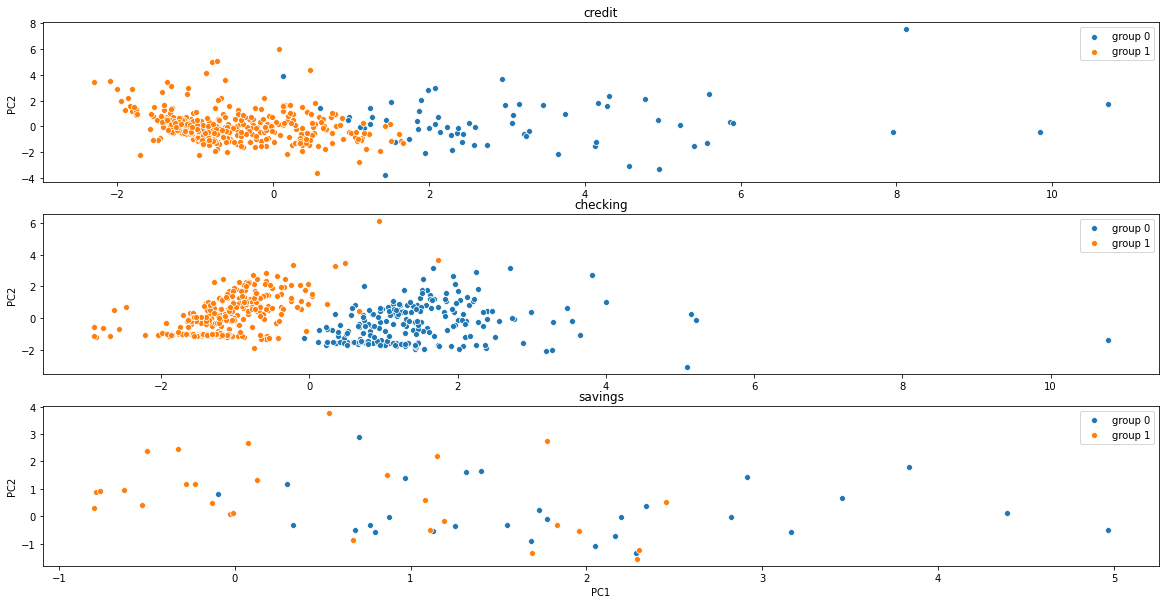

In [298]:
fig, ax = plt.subplots(3,figsize=(20,10))

sns.scatterplot(x="PC1", y="PC2", data=credit_PCA_kmean[credit_PCA_kmean['y_res']==0], label = 'group 0', ax = ax[0])
sns.scatterplot(x="PC1", y="PC2", data=credit_PCA_kmean[credit_PCA_kmean['y_res']==1], label = 'group 1', ax = ax[0])
ax[0].set(title='credit', xlabel='')

sns.scatterplot(x="PC1", y="PC2", data=checking_PCA_kmean[checking_PCA_kmean['y_res']==0], label = 'group 0',ax = ax[1])
sns.scatterplot(x="PC1", y="PC2", data=checking_PCA_kmean[checking_PCA_kmean['y_res']==1], label = 'group 1',ax = ax[1])
ax[1].set(title='checking', xlabel='')

sns.scatterplot(x="PC1", y="PC2", data=savings_PCA_kmean[savings_PCA_kmean['y_res']==0], label = 'group 0',ax = ax[2])
sns.scatterplot(x="PC1", y="PC2", data=savings_PCA_kmean[savings_PCA_kmean['y_res']==1], label = 'group 1',ax = ax[2])
ax[2].set(title='savings')

# Stretch

## Checking

In [299]:
checking_PCA_kmean_stretch = copy.deepcopy(checking_PCA_kmean)

In [300]:
x_scale = checking_scaled.values

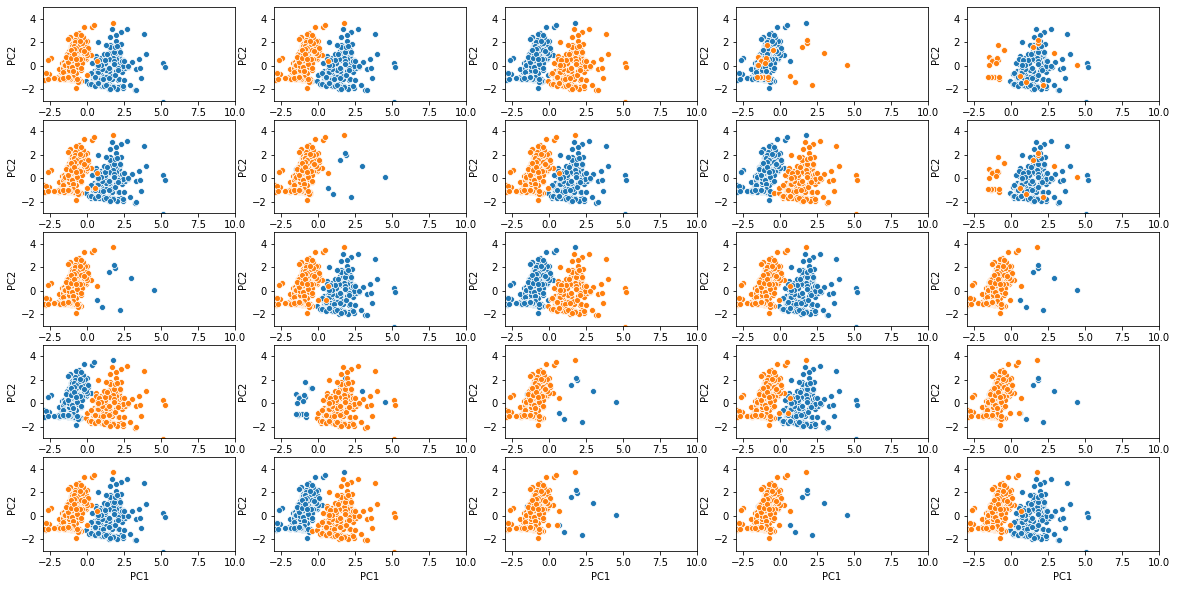

In [301]:
fig, ax = plt.subplots(5,5,figsize=(20,10))
row = 0
col = 0
for i in range(25):
    it = i + 1
    if col ==5:
        col = 0
        row += 1
    KM = KMeans(n_clusters = 3, max_iter=it)
    y_res = KM.fit_predict(x_scale)
    checking_PCA_kmean_stretch['y_res'] = y_res
    p=sns.scatterplot(x="PC1", y="PC2", data=checking_PCA_kmean_stretch[checking_PCA_kmean_stretch['y_res']==0],ax=ax[row][col])
    p=sns.scatterplot(x="PC1", y="PC2", data=checking_PCA_kmean_stretch[checking_PCA_kmean_stretch['y_res']==1],ax=ax[row][col])
    p.set(xlim=(-3, 10))
    p.set(ylim=(-3, 5))
    col += 1

## Savings

In [302]:
savings_PCA_kmean_stretch = copy.deepcopy(savings_PCA_kmean)

In [303]:
x_scale = savings_scaled.values

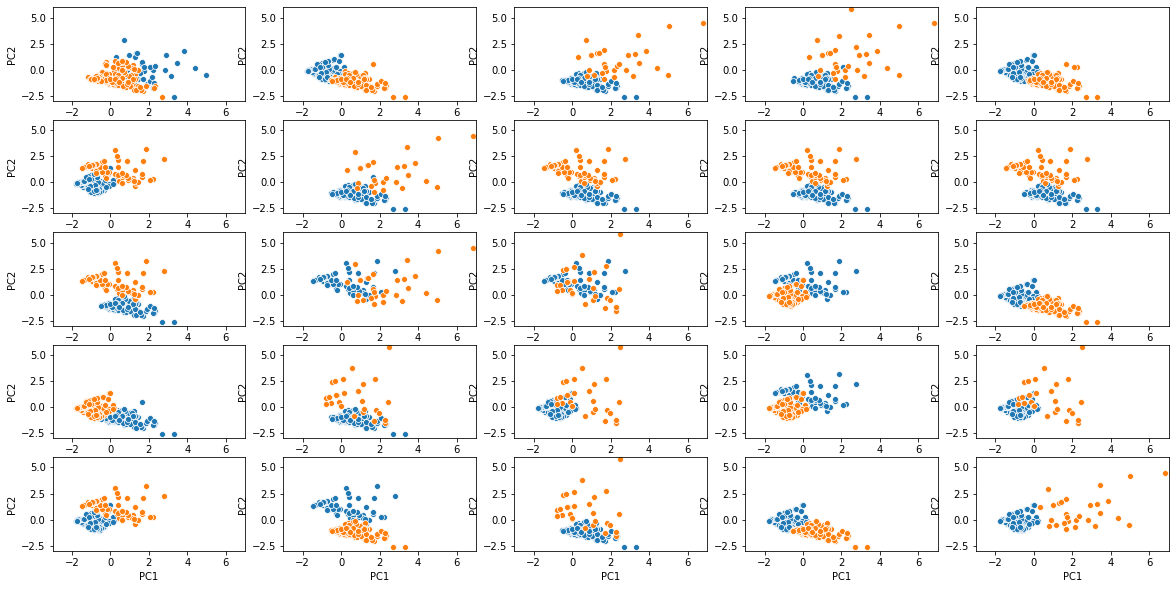

In [304]:
fig, ax = plt.subplots(5,5,figsize=(20,10))
row = 0
col = 0
for i in range(25):
    it = i + 1
    if col ==5:
        col = 0
        row += 1
    KM = KMeans(n_clusters = 5, max_iter=it)
    y_res = KM.fit_predict(x_scale)
    savings_PCA_kmean_stretch['y_res'] = y_res
    s=sns.scatterplot(x="PC1", y="PC2", data=savings_PCA_kmean_stretch[savings_PCA_kmean_stretch['y_res']==0],ax=ax[row][col])
    s=sns.scatterplot(x="PC1", y="PC2", data=savings_PCA_kmean_stretch[savings_PCA_kmean_stretch['y_res']==1],ax=ax[row][col])
    s.set(xlim=(-3, 7))
    s.set(ylim=(-3, 6))
    col += 1

## Credit

In [305]:
credit_PCA_kmean_stretch = copy.deepcopy(credit_PCA_kmean)

In [306]:
x_scale = credit_scaled.values

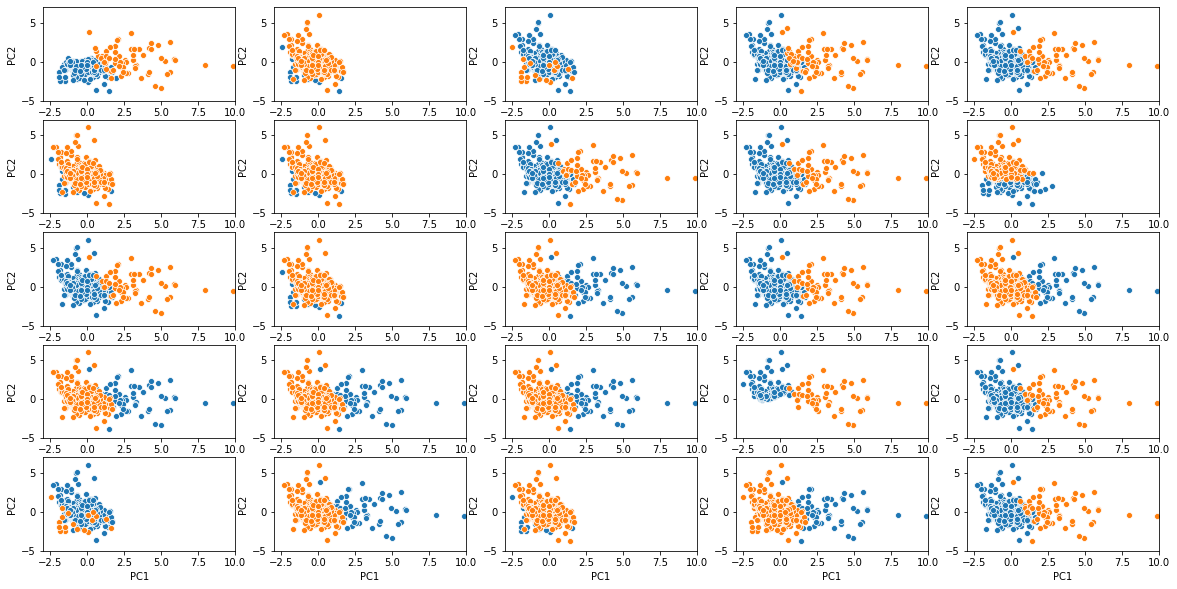

In [307]:
fig, ax = plt.subplots(5,5,figsize=(20,10))
row = 0
col = 0
for i in range(25):
    it = i + 1
    if col ==5:
        col = 0
        row += 1
    KM = KMeans(n_clusters = 3, max_iter=it)
    y_res = KM.fit_predict(x_scale)
    credit_PCA_kmean_stretch['y_res'] = y_res
    c=sns.scatterplot(x="PC1", y="PC2", data=credit_PCA_kmean_stretch[credit_PCA_kmean_stretch['y_res']==0],ax=ax[row][col])
    c=sns.scatterplot(x="PC1", y="PC2", data=credit_PCA_kmean_stretch[credit_PCA_kmean_stretch['y_res']==1],ax=ax[row][col])
    c.set(xlim=(-3, 10))
    c.set(ylim=(-5, 7))
    col += 1